# 机器学习之kNN算法

#### 【简介】

古人云：“**近朱者赤，近墨者黑**”。其实机器学习中的kNN算法的核心思想就是这句流传至今的名言。**kNN算法**又称为**K近邻算法**，是众多机器学习算法中少有的**懒惰学习算法**，该算法不仅可以用来**回归**也可以用来**分类**。

#### 【目录】

1. [kNN算法原理](#1.-kNN算法原理)
2. [使用sklearn中的kNN算法进行分类](#2.-使用sklearn中的kNN算法进行分类)
3. [使用sklearn中的kNN算法进行回归](#3.-使用sklearn中的kNN算法进行回归)
4. [分析红酒数据](#4.-分析红酒数据)
5. [使用kNN算法进行预测](#5.-使用kNN算法进行预测)

## 1. kNN算法原理

### 什么是K最近邻算法

在许多机器学习相关的书籍当中，最开始被介绍的算法大多都是**kNN算法**。这是因为kNN算法与机器学习中的其他算法相比有着**简单易懂**的特点。

机器学习让人真正感到困难的部分其实是它的数学部分，很多数学基础不好的同学在学习机器学习时看见满篇的多元求导恐怕都快疯了吧。这确实是一个无可避免的门槛，虽然很多书都会说不用看数学也可以学会机器学习，但这样学来的知识宛若无根之木，是靠不住的，大家在学习知识的时候一定不能只注重怎么实现，也要注意其背后的原理，知其然而知其所以然才是我们的目标。

但**kNN算法**则没有这方面的问题，它的**原理十分简单**，在介绍它的理论时，我们不需要复杂的推导就可以向大家清楚地说明它的由来，确确实实是一个很适合入门的算法。

**kNN算法**属于**监督学习**算法，监督学习所需要做的是在给定一部分带有**特征**和**标签**两部分数据的情况下，根据这一部分的特征和数据建立一个模型，之后当我们输入新的特征时，这个模型可以返回这种特征所应该贴上的标签。

那么，如何从原有的数据中建立一个模型呢？kNN算法的思想就是，**物以类聚人以群分**。即相似的人和物会相聚在一起。

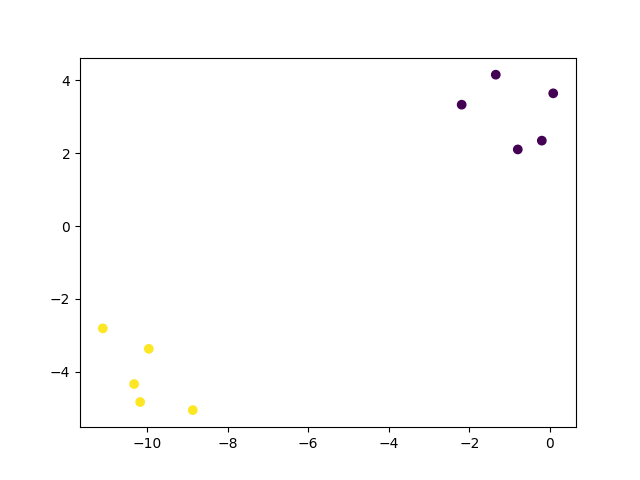

kNN算法的流程：

1. 计算待测数据与已有的数据之间的距离
2. 按照距离的递增关系排序
3. 选取距离最小的K个点
4. 取这K个点中的最多的类别作为待测数据的类别

算法步骤虽然有4步，但用一句话就能说明白。kNN算法判定待测数据属于哪个类别的依据就是根据离它最近的k个点的类别。哪个类别多，它就属于哪个类别。很深刻的体现了“近朱者赤，近墨者黑”的思想。

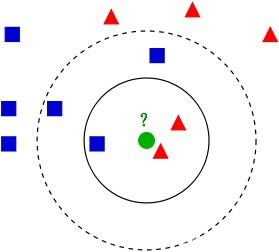

如图所示，当我们设定K为3时，离绿色的待测点最近的3个点的类别分别为蓝色，红色，红色。由于蓝红的比分是1:2，所以绿色的待测点属于红色类。

当设定K为5时，离绿色的待测点最近的5个点的类别分别为红色、红色、蓝色、蓝色、蓝色。蓝红的比分是3:2，所以绿色的待测点属于蓝色类。

### kNN算法的优缺点

任何事物都有优缺点，kNN算法也不例外。

**kNN算法**的**优点**有：

- 理解简单，所需数学知识基本为0
- 既能用于分来，又能用于回归
- 支持多分类

kNN算法可以用于回归，回归的思路是将离待测点最近的k个点的平均值作为待测点的回归预测结果。

kNN算法在测试阶段是看离待测点最近的k个点的类别比分，所以不管训练数据中有多少种类别，都可以通过类别比分来确定待测点类别。

>注意：当然会有类别比分打平的情况，这种情况下可以看待测点离哪个类别最近，选最近的类别作为待测点的预测类别。

当然**kNN算法**的**缺点**也很明显，就是当训练集数据量比较大时，**预测**过程的**效率**很**低**。这是因为kNN算法在预测过程中需要计算待测点与训练集中所有点的距离并排序。可想而知，当数据量比较大的时候，效率会特别低。对于时间敏感的业务不太适合。

## 2. 使用sklearn中的kNN算法进行分类

### 任务描述

编写一个能对数据进行分类的程序。

### 相关知识

为了完成本任务，需要：

- 更进一步了解kNN算法；
- 了解sklearn中KNeighborsClassifier的参数。

#### 更进一步了解K近邻算法

我们已经介绍了kNN算法的基础知识，下面我们再介绍一下kNN算法的更多内容。

在kNN算法中，待分析样本的类别是由离其最近的K个样本的类别来决定的。所以kNN算法所考虑到的历史数据信息是很少的，基本只由**K值**的选择以及**距离函数**的选择来决定。当K值比较大时，所考虑到的样本数目会更多，但是kNN算法的初衷“近朱者赤，近墨者黑”的基本思想就无法得到运用了。而当K值比较小时，所能考虑到的样本数量就很少，这时kNN算法在噪音比较多的数据里效果很差。

除了K值之外，kNN算法的另一个核心参数是距离函数的选择。虽然在上一节的描述中，我们是用图片来举例说明kNN算法的。但实际上这里所说的距离与我们日常生活中所意识到的距离是不同的。在日常生活中我们所说的距离往往是欧氏距离，也即平面上两点相连后线段的长度。

欧氏距离的定义如下：

$$
d(A,B) = \sqrt{\sum_{i=0}(A_i - B_i)^2}
$$

除此之外，在机器学习中常见的距离定义有以下几种：

- 汉明距离：两个字符串对应位置不一样的个数。汉明距离是以理查德·卫斯里·汉明的名字命名的。在信息论中，两个等长字符串之间的汉明距离是两个字符串对应位置的不同字符的个数。换句话说，它就是将一个字符串变换成另外一个字符串所需要替换的字符个数
- 马氏距离：表示数据的协方差距离。计算两个样本集相似度的距离
- 余弦距离：两个向量的夹角作为一种判别距离的度量
- 曼哈顿距离：两点投影到各轴上的距离总和
- 切比雪夫距离：两点投影到各轴上距离的最大值
- 标准化欧氏距离： 欧氏距离里每一项除以标准差

还有一种距离叫闵可夫斯基距离，如下：

$$
d(A,B)= \sqrt[q]{\sum_{i=0}(A_i - B_i)^p)}
$$

当q为1时，即为曼哈顿距离。当q为2时，即为欧氏距离。

#### 了解sklearn中KNeighborsClassifier的参数

使用sklearn中使用kNN算法的示例代码如下，其中X_train、y_train和X_test分别表示训练集数据、训练集标签和测试集数据：

`KNeighborsClassifier()`的构造函数比较常用的参数有以下几个:

- `n_neighbors`：即K近邻算法中的K值，为一整数，默认为5
- `metric`：距离函数。参数可以为字符串（预设好的距离函数）或者是callable（可调用对象，也就是函数）。默认值为闵可夫斯基距离
- `p`：当`metric`为闵可夫斯基距离时，上文中的q值，默认为2

### 实操练习

#### 编程要求

在`Begin - End`区域内补充代码，具体任务如下：

完成classification函数。函数需要完成的功能是使用KNeighborsClassifier对X_test进行分类。其中函数的参数如下：

- `X_train`：训练集数据
- `y_train`：训练集标签
- `X_test`：测试集数据

#### 测试说明

输出准确率，应高于0.95

In [1]:
from sklearn.neighbors import KNeighborsClassifier

def classification(X_train, y_train, X_test):
    '''
    使用KNeighborsClassifier对X_test进行分类
    :param X_train: 训练集数据
    :param y_train: 训练集标签
    :param X_test: 测试集数据
    :return: 测试集预测结果
    '''
    #********* Begin *********#
    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)
    return clf.predict(X_test)
    #********* End *********#

In [4]:
# 测试模型性能
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data.astype(int)
y = iris.target
# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=233
)
# 分类
y_pred = classification(X_train, y_train, X_test)
# 评估
acc = accuracy_score(y_test, y_pred)
print('分类正确率：{:.2f}'.format(acc))

分类正确率：0.97


## 3. 使用sklearn中的kNN算法进行回归

### 任务描述

编写一个能对数据进行分类的程序。

### 相关知识

为了完成本任务，需要掌握`sklearn`中`KNeighborsRegressor`的用法。

#### KNeighborsRegressor

需要使用kNN算法进行回归时，只需要把`KNeighborsClassifier`换成`KNeighborsRegressor`即可，其参数和`KNeighborsClassifier`的参数是一样的。

### 实操练习

#### 编程要求

根据方法内的提示，在`Begin - End`区域内进行代码补充，具体任务如下：

完成`regression`函数。函数需要完成的功能是使用`KNeighborsRegressor`对`X_test`进行分类。其中函数的参数如下：

- X_train：训练集数据
- y_train：训练集标签
- X_test：测试集数据

#### 测试说明

输出R2分数，应高于0.75

In [5]:
from sklearn.neighbors import KNeighborsRegressor
def regression(X_train, y_train, X_test):
    '''
    使用KNeighborsRegressor对X_test进行分类
    :param X_train: 训练集数据
    :param y_train: 训练集标签
    :param X_test: 测试集数据
    :return: 测试集预测结果
    '''
    #********* Begin *********#
    clf = KNeighborsRegressor()
    clf.fit(X_train, y_train)
    return clf.predict(X_test)
    #********* End *********#

In [26]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
# 加载波斯顿房价数据集
boston = datasets.load_boston()
# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, 
    test_size=0.2, random_state=12
)

# KNN回归
y_pred = regression(X_train, y_train, X_test)
# 评估KNN回归性能
r2 = r2_score(y_pred, y_test)
print('R2 = {:.2f}'.format(r2))

R2 = 0.32


## 4. 分析红酒数据

### 任务描述

编写Python代码，实现计算平均酒精含量的功能。

### 相关知识

为了完成本任务，需要掌握简单的数据分析。

#### 红酒数据分析

sklearn中已经内置的红酒数据，获取红酒数据的代码如下:

In [27]:
from sklearn.datasets import load_wine
wine_dataset = load_wine()
# 打印红酒数据集中的特征的名称
print(wine_dataset['feature_names'])

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


从打印结果可以看出，该数据集中包含了红酒的酒精含量、苹果酸含量、颜色饱和度等信息。

同样我们可以看下红酒的标签名称，代码如下：

In [28]:
from sklearn.datasets import load_wine
wine_dataset = load_wine()
# 打印红酒数据集中的标签的名称
print(wine_dataset['target_names'])

['class_0' 'class_1' 'class_2']


可以看出该数据集中红酒的种类总共为3类。也就是说如果用机器学习算法来对其进行分类的话，属于多分类问题。而我们所学习的kNN算法正好可以解决多分类问题。

### 实操练习

#### 编程要求

根据方法内的提示，在`Begin - End`区域内进行代码补充，完成`alcohol_mean`函数。该函数需要完成返回红酒数据中的平均酒精含量。其中函数的参数解释如下:

- `data`：红酒数据对象。

#### 测试说明

输出平均酒精含量

In [29]:
import numpy as np

def alcohol_mean(data):
    '''
    返回红酒数据中红酒的酒精平均含量
    :param data: 红酒数据对象
    :return: 酒精平均含量，类型为float
    '''
    #********* Begin *********#
    return data.data[:, 0].mean()
    #********* End **********#

In [31]:
# 测试代码
print('平均酒精含量：{:.2f}'.format(alcohol_mean(wine_dataset)))

平均酒精含量：13.00


## 5. 对数据进行标准化

### 任务描述

编写Python代码，实现对数据的标准化

### 相关知识

为了完成本任务，需要掌握标准化的相关知识。

#### 标准化相关知识

我们可以计算以下红酒数据中每个特征所对应的均值和标准差，代码如下:

In [32]:
from sklearn.datasets import load_wine
wine_dataset = load_wine()
print(wine_dataset.data.mean(0))
print(wine_dataset.data.std(0))

[1.30006180e+01 2.33634831e+00 2.36651685e+00 1.94949438e+01
 9.97415730e+01 2.29511236e+00 2.02926966e+00 3.61853933e-01
 1.59089888e+00 5.05808988e+00 9.57449438e-01 2.61168539e+00
 7.46893258e+02]
[8.09542915e-01 1.11400363e+00 2.73572294e-01 3.33016976e+00
 1.42423077e+01 6.24090564e-01 9.96048950e-01 1.24103260e-01
 5.70748849e-01 2.31176466e+00 2.27928607e-01 7.07993265e-01
 3.14021657e+02]


从打印结果可以看出，有的特征的均值和标准差都比较大，例如如最后一个特征。如果现在用kNN算法来对这样的数据进行分类的话，kNN算法会认为最后一个特征比较重要。因为假设有两个样本的最后一个特征值分别为1和100，那么这两个样本之间的距离可能就被这最后一个特征决定了。这样就很有可能会影响kNN算法的准确度。为了解决这种问题，我们可以对数据进行标准化。

标准化的手段有很多，而最为常用的就是`StandardScaler`。`StandardScaler`通过删除平均值和缩放到单位方差来标准化特征，并将标准化的结果的均值变成0，标准差为1。

假设标准化后的特征为$z$，标准化之前的特征为$x$，特征的均值为$\mu$，方差为$s$。则StandardScaler可以表示为$z=(x - \mu)/s$。

`sklearn`中已经提供了`StandardScaler`的接口，使用代码如下:

In [33]:
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
# 实例化StandardScaler对象
scaler = StandardScaler()
# 用data的均值和标准差来进行标准化，并将结果保存到after_scaler
after_scaler = scaler.fit_transform(data)
# 用刚刚的StandardScaler对象来进行归一化
after_scaler2 = scaler.transform([[2, 2]])
print(after_scaler)
print(after_scaler2)

[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
[[3. 3.]]


根据打印结果可以看出，经过变换后，数据已经缩放成了均值为0，标准差为1的分布。

### 实操练习

#### 编程要求

根据方法内的提示，在`Begin - End`区域内进行代码补充，完成`scaler`函数。该函数需要完成是返回标准化后的数据。其中函数的参数解释如下:

- data：红酒数据对象

#### 测试说明

输出标准化后的数据集

In [34]:
from sklearn.preprocessing import StandardScaler

def scale(data):
    '''
    返回标准化后的红酒数据
    :param data: 红酒数据对象
    :return: 标准化后的红酒数据，类型为ndarray
    '''
    #********* Begin *********#
    scaler = StandardScaler()
    after_scale = scaler.fit_transform(data['data'])
    return after_scale
    #********* End **********#

In [35]:
scale(wine_dataset)

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## 5. 使用kNN算法进行预测

### 任务描述

编写Python代码，实现红酒分类功能。

### 相关知识

已掌握

### 实操练习

#### 编程要求

请仔细阅读下列代码，根据方法内的提示，在`Begin - End`区域内进行代码补充，完成`classify`函数。该函数需要完成对红酒的分类，并将分类结果返回。其中函数的参数解释如下:

- `X_train`：训练集数据，类型为`ndarray`
- `y_train`：训练集标签，类型为`ndarray`
- `y_test`：测试集数据，类型为`ndarray`

#### 测试说明

输出分类的准确率，应高于0.92

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

def classify(X_train, y_train, X_test):
    '''
    对X_test进行红酒分类
    :param X_train: 训练集数据，类型为ndarray
    :param y_train: 训练集标签，类型为ndarray
    :param X_test: 测试集数据，类型为ndarray
    :return: 测试集数据的分类结果
    '''
    #********* Begin *********#
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)
    return clf.predict(X_test)
    #********* End **********#

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    wine_dataset.data, wine_dataset.target, 
    test_size = 0.2, random_state=12
)

y_pred = classify(X_train, y_train, X_test)

accuracy_score(y_test, y_pred)

0.9444444444444444